In [1226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1227]:
df_train = pd.read_csv('D:/Stevens GIT/Stevens_IT-MS_in_CS/SPRING_25/CS559_Applications_of_ML/Project/train_data.csv')
df_train.shape

(5807, 97)

In [1228]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5807 entries, 0 to 5806
Data columns (total 97 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Index                                                     5807 non-null   int64  
 1   Bankrupt?                                                 5807 non-null   int64  
 2    ROA(C) before interest and depreciation before interest  5807 non-null   float64
 3    ROA(A) before interest and % after tax                   5807 non-null   float64
 4    ROA(B) before interest and depreciation after tax        5807 non-null   float64
 5    Operating Gross Margin                                   5807 non-null   float64
 6    Realized Sales Gross Margin                              5807 non-null   float64
 7    Operating Profit Rate                                    5807 non-null   float64
 8    Pre-tax net Inter

In [1229]:
null_sum = df_train.isnull().sum()
print(null_sum.values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [1230]:
# Checking for duplicates
df_train.duplicated().sum()

0

In [1231]:
target = df_train['Bankrupt?']
index = df_train['Index']
df_train = df_train.drop(columns=['Bankrupt?','Index'])

Bankrupt?
0    5609
1     198
Name: count, dtype: int64


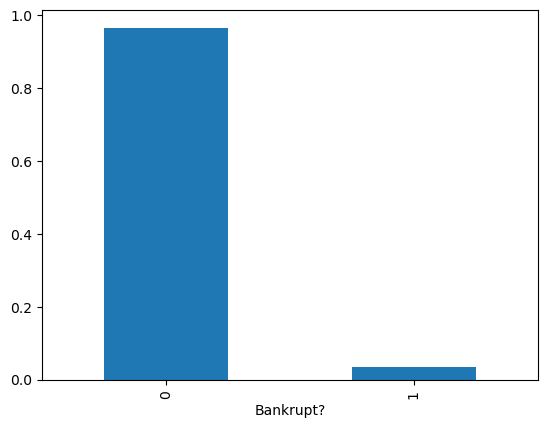

In [1232]:
target.value_counts(normalize=True).plot(kind='bar')
print(target.value_counts())

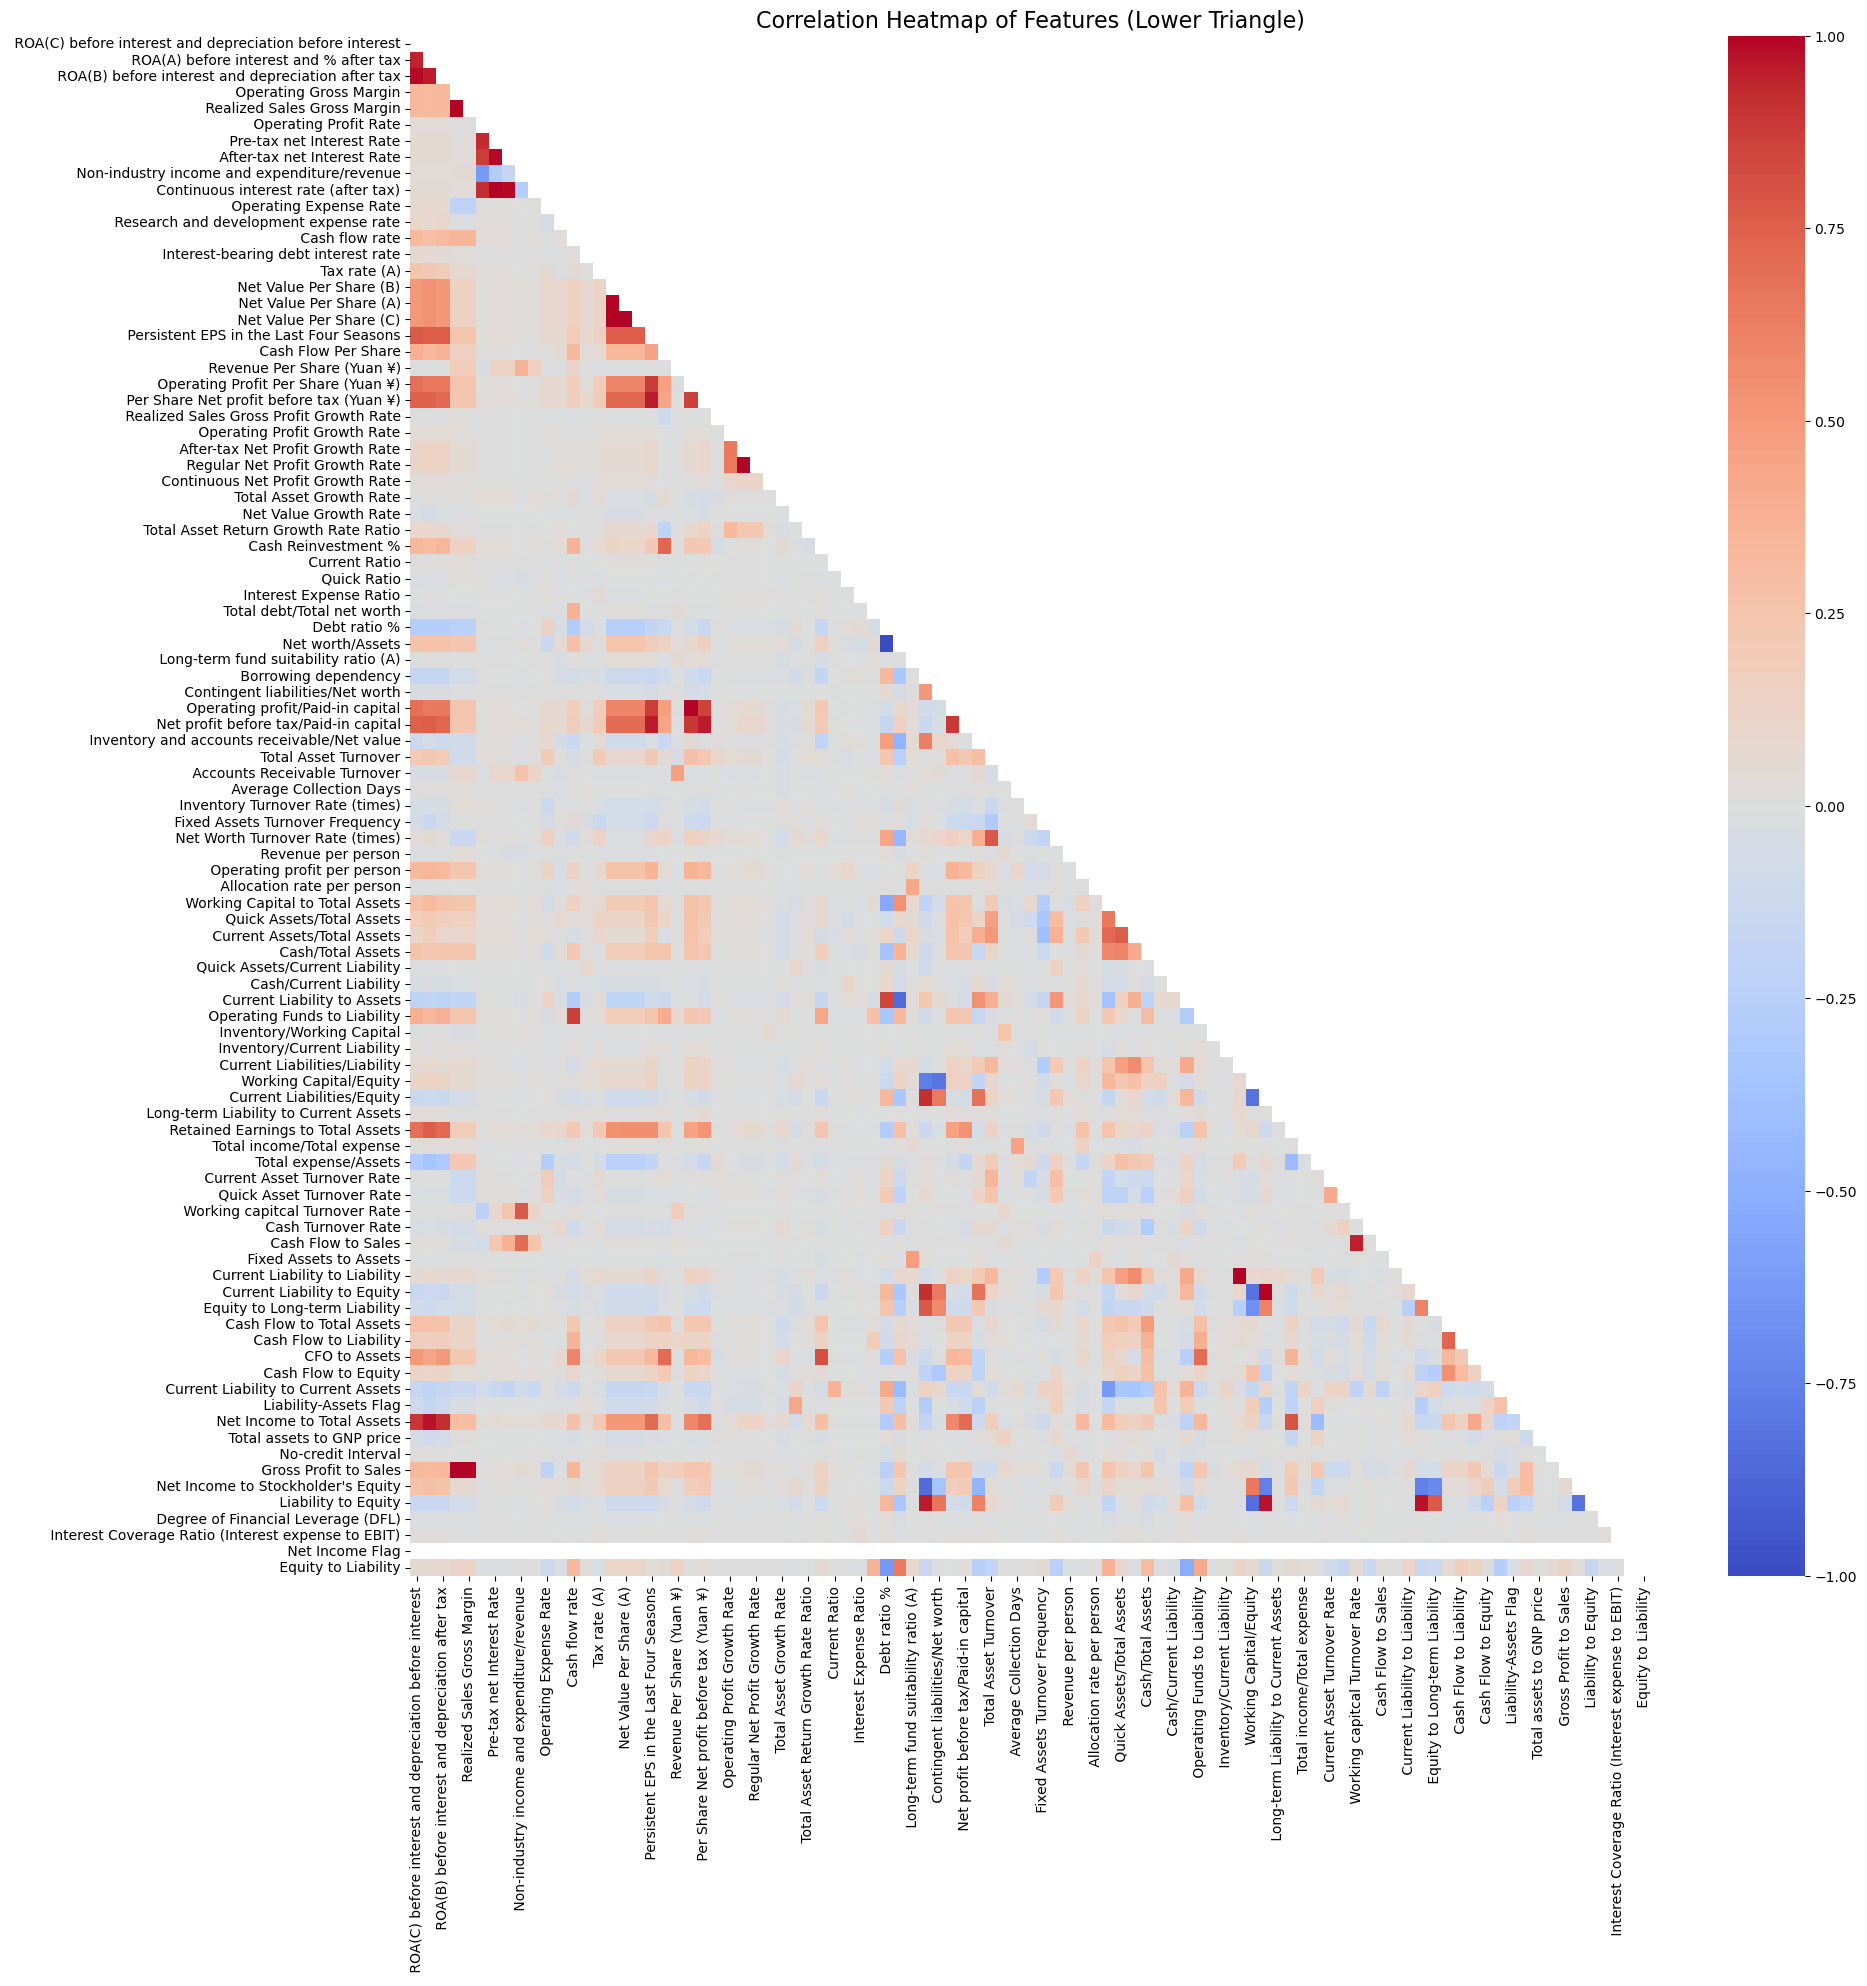

In [1233]:
# Compute the correlation matrix
corr = df_train.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features (Lower Triangle)", fontsize=16)
plt.show()

In [1234]:
# Identify features with high correlation
high_corr_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.95:
            colname = corr.columns[i]
            high_corr_features.add(colname)

# Drop the highly correlated features
df_train_reduced = df_train.drop(columns=high_corr_features)

df_train_reduced.shape

(5807, 78)

In [1235]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train_scaled = scaler.fit_transform(df_train_reduced)
df_train_scaled = pd.DataFrame(df_train_scaled , columns=df_train_reduced.columns)
df_train_scaled.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,-0.904871,-0.835696,-0.761144,0.012766,0.007361,-0.017110,1.856870,-0.758891,-0.281113,-0.150614,-0.825515,-0.358886,-0.706359,-0.281440,-0.022735,-0.747839,-0.034667,-0.062296,-0.053187,-0.017323,0.420517,-0.014868,-0.079800,-0.130322,-0.013124,-0.032363,-0.111830,-0.027694,0.046000,-0.136615,-0.103113,-0.005703,-0.392394,-0.011698,-0.046611,-0.040364,-0.656887,-0.408851,-0.164795,-0.013124,-0.367133,-0.041424,-0.599983,-1.222083,-1.196942,-0.394952,-0.018505,-0.073112,-0.795619,-0.331298,0.015106,-0.095929,-1.726027,-0.160118,-0.216287,-0.092512,-0.362421,-0.038077,-0.480469,1.891427,0.510768,-0.006180,0.999853,-0.013124,0.125627,0.345596,0.075484,-0.399582,0.184105,-0.053879,-0.03474,-0.048669,-0.041164,-0.099581,-0.059112,-0.010488,0.0,-0.311418
1,0.404409,0.213147,-0.129318,0.023594,0.023322,-0.011640,-0.616797,-0.654832,-0.164360,-0.150614,1.031015,0.279836,0.194977,0.052236,-0.022735,0.256702,-0.021756,0.013129,0.031044,-0.003023,0.437708,-0.014868,-0.002919,0.089406,-0.013124,-0.032363,-0.054039,-0.027694,0.047114,-0.127291,-0.235933,0.245015,0.292296,0.192860,-0.046611,-0.040364,-0.656887,-0.408851,0.037305,-0.013124,-0.051018,-0.041424,0.257634,0.407801,0.415935,-0.429802,-0.018505,-0.073112,0.211821,-0.146468,-0.011323,-0.095929,0.310787,0.127800,-0.058797,-0.092512,0.715392,-0.009517,-0.427061,-0.422016,-0.638547,-0.002949,0.662371,-0.013124,-0.153845,0.095895,-0.010931,0.031501,0.049888,-0.183567,-0.03474,-0.048669,0.014686,0.094670,-0.057962,-0.005295,0.0,-0.311863
2,1.081097,0.933137,0.246730,0.031010,0.033640,-0.009133,-0.616797,0.863207,0.296969,-0.150614,-0.077977,0.364336,0.730232,0.504943,-0.022735,0.674321,-0.019874,0.012548,0.032231,-0.002845,1.434792,-0.014868,0.043567,0.379369,-0.013124,-0.032363,-0.046320,-0.027694,0.012582,-0.122269,-0.056786,-0.035881,-0.041839,-0.055531,-0.046611,

In [1236]:
df_train_scaled.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5807.000000,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5807.000000,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5807.0,5.807000e+03
mean,-5.298175e-16,1.563757e-15,6.093513e-16,1.125709e-16,-3.720958e-15,-3.010048e-16,-4.404949e-17,0.000000,7.341582e-17,-8.565178e-18,-1.345957e-17,-4.282589e-16,-7.708661e-17,-8.840488e-17,4.894388e-18,5.383826e-17,2.740857e-16,-3.913063e-15,-3.522736e-15,1.381441e-15,-8.228689e-17,-1.223597e-18,-1.460975e-15,-6.638013e-16,-1.223597e-18,1.835395e-18,2.496138e-16,4.282589e-18,-1.823159e-16,5.139107e-17,5.826769e-15,-5.689726e-17,6.244627e-15,1.150181e-16,-6.117985e-19,-5.200287e-18,-1.223597e-16,3.976690e-17,-5.628546e-17,2.447194e-18,-4.074578e-16,1.101237e-17,-4.356005e-16,5.139107e-17,2.814273e-16,-6.423884e-17,0.000000,8.565178e-18,1.318426e-16,-4.404949e-16,-1.407136e-15,1.223597e-17,3.533136e-16,-5.973600e-15,-1.243174e-15,-4.894388e-18,5.445006e-16,1.223597e-18,1.376547e-17,3.793150e-17,4.404949e-17,-6.784845

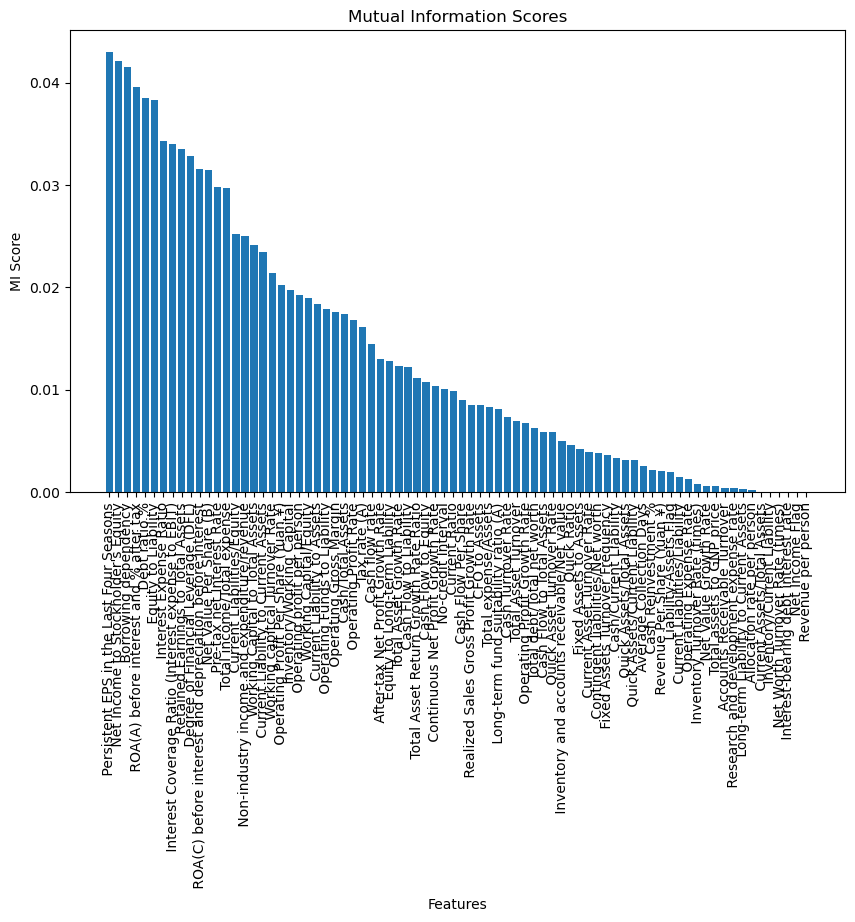

In [1237]:
from sklearn.feature_selection import mutual_info_classif

mi_score = mutual_info_classif(df_train_scaled, target, random_state=42)

mi_df = pd.DataFrame({
    "Feature": df_train_scaled.columns,
    "MI SCORE": mi_score
}).sort_values(by="MI SCORE",ascending=False)

# Plotting the mutual information scores
plt.figure(figsize=(10, 6))
plt.bar(mi_df["Feature"], mi_df["MI SCORE"])
plt.xticks(rotation=90)
plt.title("Mutual Information Scores")
plt.xlabel("Features")
plt.ylabel("MI Score")
plt.show()


In [1238]:
# Display the full mutual information scores DataFrame
pd.set_option('display.max_rows', None)  # Set to display all rows
print(mi_df.sort_values(by="MI SCORE", ascending=False))

# Drop rows where "MI SCORE" is less than 0.0x
mi_01 = mi_df[mi_df["MI SCORE"] >= 0.01]
mi_02 = mi_df[mi_df["MI SCORE"] >= 0.02]
mi_03 = mi_df[mi_df["MI SCORE"] >= 0.03]

                                              Feature  MI SCORE
12            Persistent EPS in the Last Four Seasons  0.042984
73                 Net Income to Stockholder's Equity  0.042080
30                               Borrowing dependency  0.041486
1              ROA(A) before interest and % after tax  0.039551
28                                       Debt ratio %  0.038502
77                                Equity to Liability  0.038314
26                             Interest Expense Ratio  0.034304
75   Interest Coverage Ratio (Interest expense to ...  0.034044
56                  Retained Earnings to Total Assets  0.033529
74                 Degree of Financial Leverage (DFL)  0.032861
0    ROA(C) before interest and depreciation befor...  0.031608
11                            Net Value Per Share (B)  0.031466
4                           Pre-tax net Interest Rate  0.029804
57                         Total income/Total expense  0.029674
54                         Current Liabi

## >0.01

In [1239]:
df_01 = df_train_scaled.drop(columns=[col for col in df_train_scaled.columns if col not in mi_01["Feature"].values])
df_01.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Cash flow rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Total Asset Return Growth Rate Ratio,Interest Expense Ratio,Debt ratio %,Borrowing dependency,Operating profit per person,Working Capital to Total Assets,Cash/Total Assets,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total income/Total expense,Working capitcal Turnover Rate,Equity to Long-term Liability,Cash Flow to Liability,Cash Flow to Equity,Current Liability to Current Assets,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,-0.904871,-0.835696,-0.761144,0.012766,0.007361,-0.017110,-0.281113,-0.825515,-0.358886,-0.706359,-0.747839,-0.053187,-0.017323,0.420517,-0.079800,-0.111830,0.046000,-0.103113,-0.367133,-0.599983,-0.394952,-0.795619,-0.331298,0.015106,-0.160118,-0.216287,-0.362421,-0.038077,-0.006180,0.125627,0.075484,0.184105,-0.053879,-0.041164,-0.099581,-0.059112,-0.010488,-0.311418
1,0.404409,0.213147,-0.129318,0.023594,0.023322,-0.011640,-0.164360,1.031015,0.279836,0.194977,0.256702,0.031044,-0.003023,0.437708,-0.002919,-0.054039,0.047114,-0.235933,-0.051018,0.257634,-0.429802,0.211821,-0.146468,-0.011323,0.127800,-0.058797,0.715392,-0.009517,-0.002949,-0.153845,-0.010931,0.049888,-0.183567,0.014686,0.094670,-0.057962,-0.005295,-0.311863
2,1.081097,0.933137,0.246730,0.031010,0.033640,-0.009133,0.296969,-0.077977,0.364336,0.730232,0.674321,0.032231,-0.002845,1.434792,0.043567,-0.046320,0.012582,-0.056786,0.105223,0.463279,0.140720,-0.529848,0.129539,-0.021487,0.191530,-0.176740,0.585408,0.004234,0.000144,0.243956,0.273121,0.476952,-0.411612,0.132551,0.186957,-0.056579,0.000788,-0.299792
3,-0.362077,-0.033493,-0.315077,0.021986,0.019382,-0.015660,-0.870563,-0.825515,-0.345217,-0.043531,0.036606,0.114839,0.027683,-1.889968,0.011384,0.129550,1.949721,1.608452,0.225855,0.074060,-0.539643,2.004403,-1.011419,0.110306,0.566708,0.998680,-0.060818,-0.013192,0.000082,0.506519,-0.052963,0.214430,0.093710,-0.251454,0.096120,-0.034414,0.079062,-0.659240
4,0.081298,-0.329129,-0.453469,0.020124,0.015553,-0.018851,-0.307893,4.413043,0.113321,0.158923,0.222842,0.000349,-0.005530,0.031998,-0.074659,0.056463,0.285497,-0.158649,0.221131,-0.071891,1.086518,0.666073,-0.314295,-0.028825,0.042701,0.041628,-0.083894,-0.025176,-0.006240,-0.270609,-0.266054,-0.397512,-0.003918,-0.003868,-0.006053,-0.050867,0.024184,-0.384941


In [1240]:
z_score_mask = (df_01.applymap(abs) <= 3).all(axis=1)
df_01 = df_01[z_score_mask]
target_01 = target[z_score_mask]

print(target_01.shape)
print(df_01.shape)

(4892,)
(4892, 38)


C:\Users\abdul\AppData\Local\Temp\ipykernel_24772\3741953139.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  z_score_mask = (df_01.applymap(abs) <= 3).all(axis=1)


In [1241]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
kmeans = KMeans(n_clusters=6, random_state=42 , n_init=10)
gmm = GaussianMixture(n_components=5, random_state=42)

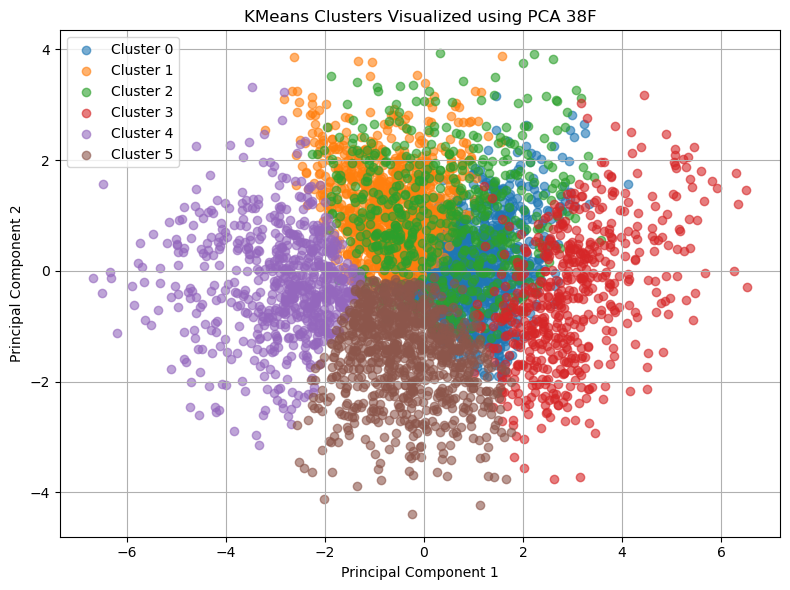

In [1242]:
model_km_01 = kmeans.fit_predict(df_01)

# Use df_01 as the selected dataset for PCA
train_selected_df_01 = df_01

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_selected_df_01)

# Add cluster labels to the PCA result
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Cluster"] = model_km_01  # Cluster labels from KMeans

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df["Cluster"].unique()):
    subset = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.6)

plt.title("KMeans Clusters Visualized using PCA 38F")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1243]:
# Attach cluster labels and summarize
cleaned_clustered_df_01 = df_train.loc[df_01.index].copy()
cleaned_clustered_df_01["Cluster"] = model_km_01

# Reattach the 'Bankrupt?' column to the cleaned_clustered_df_01 DataFrame
cleaned_clustered_df_01["Bankrupt?"] = target_01.values

# Summary of clusters
kmeans_summary = cleaned_clustered_df_01.groupby("Cluster")["Bankrupt?"].value_counts().unstack(fill_value=0)
kmeans_summary.columns = ["Not Bankrupt (y=0)", "Bankrupt (y=1)"]
kmeans_summary["Total"] = kmeans_summary.sum(axis=1)
kmeans_summary["Bankruptcy Rate (%)"] = (kmeans_summary["Bankrupt (y=1)"] / kmeans_summary["Total"]) * 100


from IPython.display import display
display(kmeans_summary)

,Not Bankrupt (y=0),Bankrupt (y=1),Total,Bankruptcy Rate (%)
Cluster,,,,
0,1127,3,1130,0.265487
1,1033,17,1050,1.619048
2,584,5,589,0.848896
3,559,0,559,0.000000
4,582,104,686,15.160350
5,869,9,878,1.025057


In [1244]:
kmeans_summary.to_excel('kmeans_n=6_38Features.xlsx', index=False)

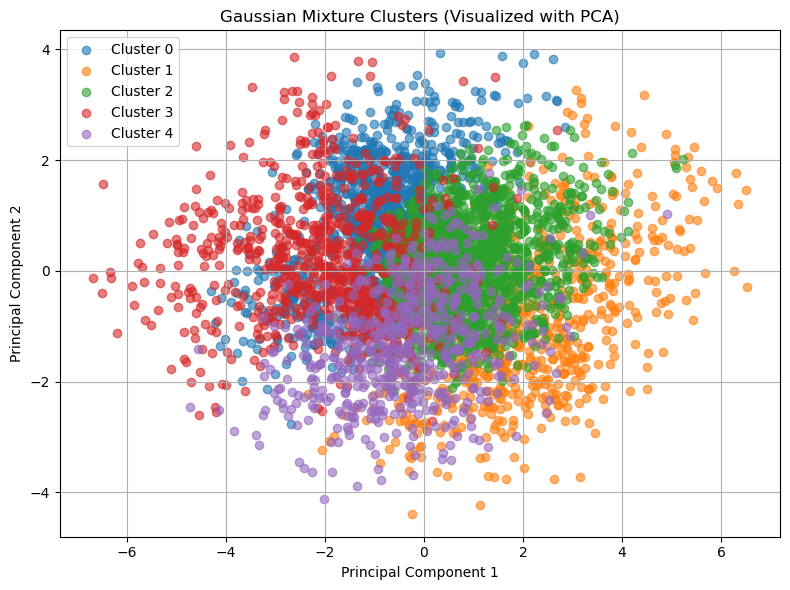

In [1245]:
model_gm_01 = gmm.fit_predict(train_selected_df_01)

# PCA for visualization
pca_result = pca.transform(train_selected_df_01)
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Cluster"] = model_gm_01

# Visualize
plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df["Cluster"].unique()):
    subset = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.6)

plt.title("Gaussian Mixture Clusters (Visualized with PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## >0.02

In [1246]:
df_02 = df_train_scaled.drop(columns=[col for col in df_train_scaled.columns if col not in mi_02["Feature"].values])
df_02.shape

(5807, 20)

In [1247]:
z_score_mask = (df_02.applymap(abs) <= 3).all(axis=1)
df_02 = df_02[z_score_mask]
target_02 = target[z_score_mask]

print(target_02.shape)
print(df_02.shape)

(5314,)
(5314, 20)


C:\Users\abdul\AppData\Local\Temp\ipykernel_24772\3011217717.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  z_score_mask = (df_02.applymap(abs) <= 3).all(axis=1)


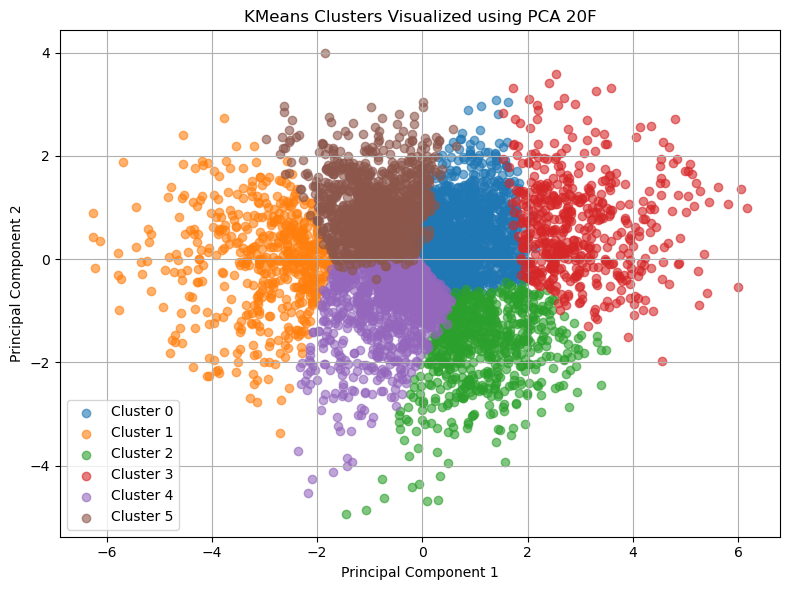

In [1248]:
model_km_02 = kmeans.fit_predict(df_02)

# Use df_02 as the selected dataset for PCA
train_selected_df_02 = df_02

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_selected_df_02)

# Add cluster labels to the PCA result
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Cluster"] = model_km_02  # Cluster labels from KMeans

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df["Cluster"].unique()):
    subset = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.6)

plt.title("KMeans Clusters Visualized using PCA 20F")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1249]:
#Attach cluster labels and summarize
cleaned_clustered_df_02 = df_train.loc[df_02.index].copy()
cleaned_clustered_df_02["Cluster"] = model_km_02

# Reattachinng the 'Bankrupt' column to the cleaned_clustered_df_02 DataFrame
cleaned_clustered_df_02["Bankrupt?"] = target_02.values

# Summary of clusters
kmeans_summary_02 = cleaned_clustered_df_02.groupby("Cluster")["Bankrupt?"].value_counts().unstack(fill_value=0)
kmeans_summary_02.columns = ["Not Bankrupt (y=0)", "Bankrupt (y=1)"]
kmeans_summary_02["Total"] = kmeans_summary_02.sum(axis=1)
kmeans_summary_02["Bankruptcy Rate (%)"] = (kmeans_summary_02["Bankrupt (y=1)"] / kmeans_summary_02["Total"]) * 100

# Display the KMeans Cluster Summary using pandas
from IPython.display import display
display(kmeans_summary_02)

,Not Bankrupt (y=0),Bankrupt (y=1),Total,Bankruptcy Rate (%)
Cluster,,,,
0,1332,2,1334,0.149925
1,450,95,545,17.431193
2,669,0,669,0.000000
3,511,0,511,0.000000
4,1013,11,1024,1.074219
5,1188,43,1231,3.493095


In [1250]:
kmeans_summary_02.to_excel('kmeans_n=6_20Features.xlsx', index=False)

c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


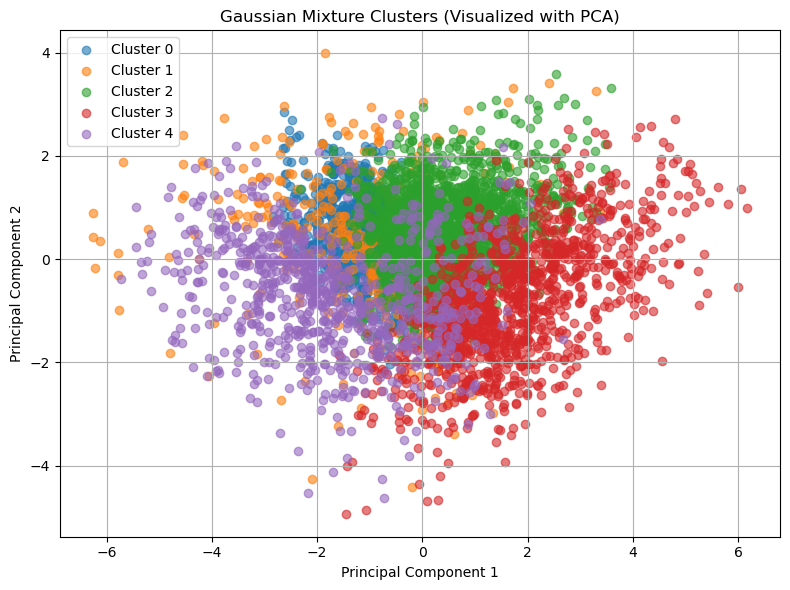

In [1251]:
model_gm_02 = gmm.fit_predict(train_selected_df_02)

# PCA for visualization
pca_result = pca.transform(train_selected_df_02)
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Cluster"] = model_gm_02


plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df["Cluster"].unique()):
    subset = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.6)

plt.title("Gaussian Mixture Clusters (Visualized with PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## >0.03

In [1252]:
df_03 = df_train_scaled.drop(columns=[col for col in df_train_scaled.columns if col not in mi_03["Feature"].values])
df_03.shape

(5807, 12)

In [1253]:
z_score_mask = (df_03.applymap(abs) <= 3).all(axis=1)
df_03 = df_03[z_score_mask]
target_03 = target[z_score_mask]

print(target_03.shape)
print(df_03.shape)

(5380,)
(5380, 12)


C:\Users\abdul\AppData\Local\Temp\ipykernel_24772\618263378.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  z_score_mask = (df_03.applymap(abs) <= 3).all(axis=1)


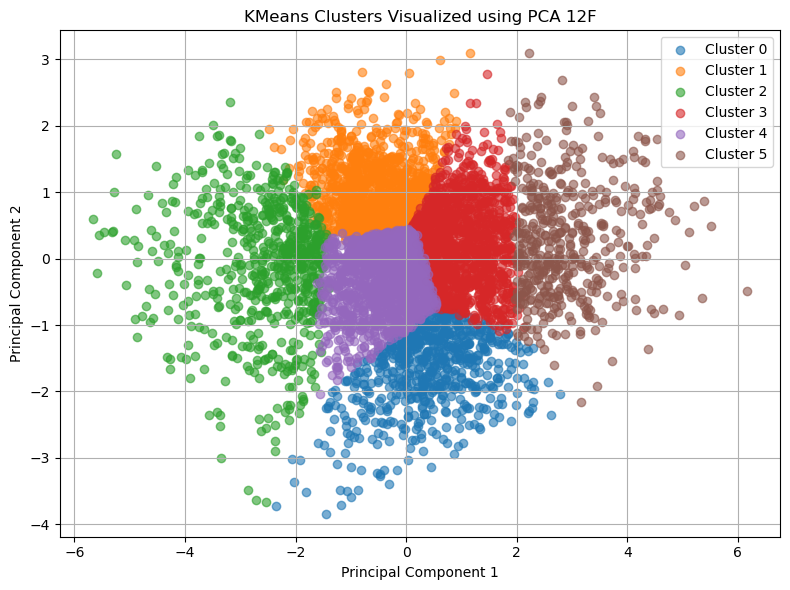

In [1254]:
model_km_03 = kmeans.fit_predict(df_03)

# Use df_03 as the selected dataset for PCA
train_selected_df_03 = df_03

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_selected_df_03)

# Add cluster labels to the PCA result
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Cluster"] = model_km_03  # Cluster labels from KMeans

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df["Cluster"].unique()):
    subset = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.6)

plt.title("KMeans Clusters Visualized using PCA 12F")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1255]:
# Attach cluster labels and summarize
cleaned_clustered_df_03 = df_train.loc[df_03.index].copy()
cleaned_clustered_df_03["Cluster"] = model_km_03

# Reattach the 'Bankrupt' column to the cleaned_clustered_df_03 DataFrame
cleaned_clustered_df_03["Bankrupt?"] = target_03.values

# Summary of clusters
kmeans_summary_03 = cleaned_clustered_df_03.groupby("Cluster")["Bankrupt?"].value_counts().unstack(fill_value=0)
kmeans_summary_03.columns = ["Not Bankrupt (y=0)", "Bankrupt (y=1)"]
kmeans_summary_03["Total"] = kmeans_summary_03.sum(axis=1)
kmeans_summary_03["Bankruptcy Rate (%)"] = (kmeans_summary_03["Bankrupt (y=1)"] / kmeans_summary_03["Total"]) * 100

# Display the KMeans Cluster Summary using pandas
from IPython.display import display
display(kmeans_summary_03)

,Not Bankrupt (y=0),Bankrupt (y=1),Total,Bankruptcy Rate (%)
Cluster,,,,
0,673,0,673,0.000000
1,1065,45,1110,4.054054
2,553,100,653,15.313936
3,1209,1,1210,0.082645
4,1257,12,1269,0.945626
5,465,0,465,0.000000


In [1256]:
kmeans_summary_03.to_excel('kmeans_n=6_12Features.xlsx', index=False)

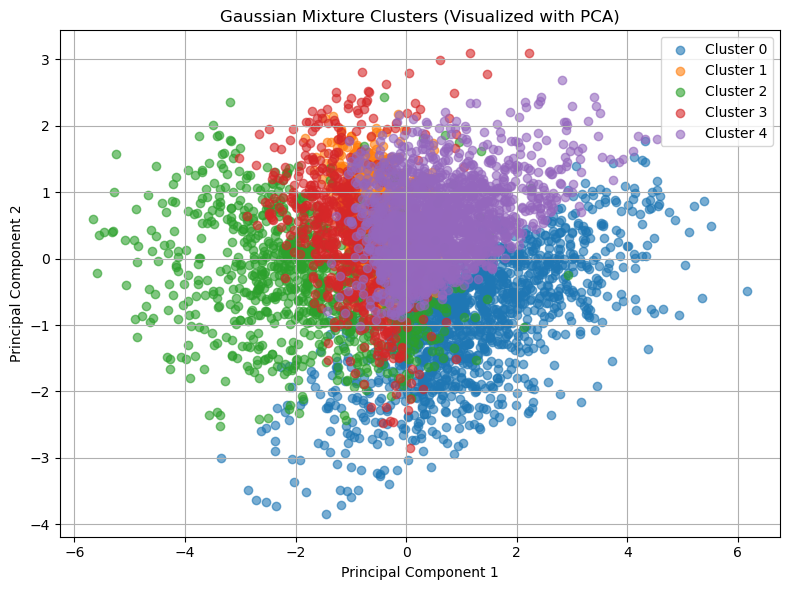

In [1257]:
model_gm_03 = gmm.fit_predict(train_selected_df_03)

#PCA for visualization
pca_result = pca.transform(train_selected_df_03)
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Cluster"] = model_gm_03


plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df["Cluster"].unique()):
    subset = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.6)

plt.title("Gaussian Mixture Clusters (Visualized with PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()